In [346]:
import seaborn as sn
import quandl
API_KEY = "yCev-u-joPYss-FULGkt"
quandl.ApiConfig.api_key = (API_KEY)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [347]:
from sklearn.metrics import  mean_squared_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [348]:
def forecast_accuracy(forecast, actual):
    mse = mean_squared_error(actual, forecast)
    return math.sqrt(mse)

In [349]:
def preprocess(df):
    df = pd.DataFrame({'Date': df.index.values,
                        'value': df['Nominal Price']
                            })
    df = df.reset_index(drop=True)
    return df
    # print(df.info())

In [350]:
def ADF(df):
    result = adfuller(df.value.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [351]:
def autocorrelation(df):
    plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


    # Original Series
    fig, axes = plt.subplots(3, 2, sharex=True)
    axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
    axes[1, 1].set_xlim([0, 30])
    plot_acf(df.value, ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
    axes[1, 1].set_xlim([0, 30])
    plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    axes[2, 1].set_xlim([0, 30])
    plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

    plt.show()

In [352]:
def partialcorrelation(df):
    plt.rcParams.update({'figure.figsize':(6,1), 'figure.dpi':120})

    fig, axes = plt.subplots(1, 2, sharex=True)
    axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
    axes[1].set(ylim=(0,4))
    axes[1].set_xlim([0, 30])
    plot_pacf(df.value.diff().dropna(), ax=axes[1])

    plt.show()

In [353]:
def get_ARIMA(train, test, d, p, q):
    model = ARIMA(train.value, order=(p,d,q))
    fitted = model.fit()
    forecast = fitted.predict(len(train), end=len(train)+ len(test) - 1)

    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train.value, label='training')
    plt.plot(test.value, label='actual')
    plt.plot(forecast, label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='lower right', fontsize=8)
    plt.show()

    return model, forecast

In [354]:
def forecast_accuracy(forecast, actual):
    mse = mean_squared_error(actual, forecast)
    return math.sqrt(mse)

Let's retrieve the data

In [355]:
jpnq_df = quandl.get('HKEX/10276')
premia_df = quandl.get('HKEX/09151')
heartCare_df = quandl.get('HKEX/06609')
acotec_df = quandl.get('HKEX/06669')

jpnq_df = preprocess(jpnq_df)
premia_df = preprocess(premia_df)
heartCare_df = preprocess(heartCare_df)
acotec_df = preprocess(acotec_df)

# ARIMA

ADF test for Null Hypothesis

In [356]:
print("Stock: Jpnq100@ep2203b")
ADF(jpnq_df)
print("\nStock: Premia Star50-u")
ADF(premia_df)
print("\nStock: HeartCare-b")
ADF(heartCare_df)
print("\nStock: Acotec-b")
ADF(acotec_df)

Stock: Jpnq100@ep2203b
ADF Statistic: -1.693576
p-value: 0.434425

Stock: Premia Star50-u
ADF Statistic: -2.044943
p-value: 0.267221

Stock: HeartCare-b
ADF Statistic: -2.643014
p-value: 0.084429

Stock: Acotec-b
ADF Statistic: -1.879595
p-value: 0.341720


Since all of them have p-value > 0.05, null hypothesis is False

Now, to find d and p

Jpnq100@ep2203b

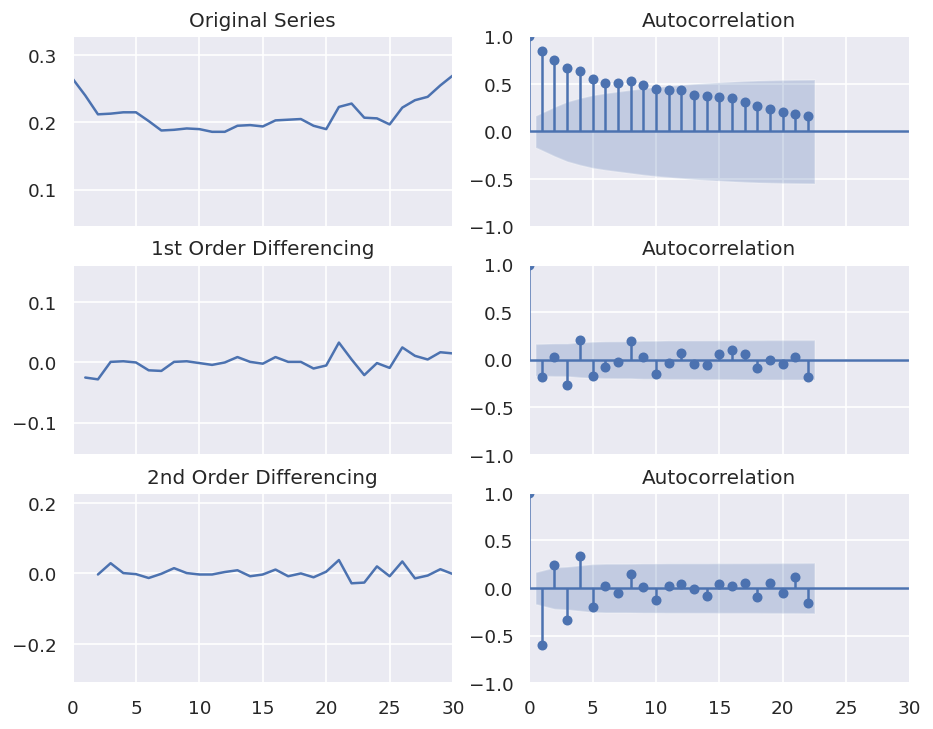

/home/ananthNB/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


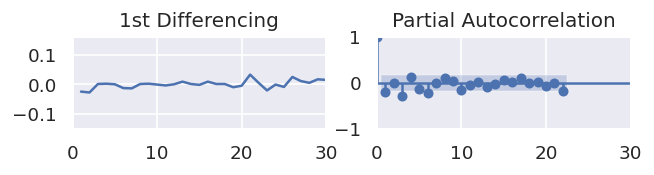

In [357]:
autocorrelation(jpnq_df)
partialcorrelation(jpnq_df)

d = 1, p = 1, q = 1

Create ARIMA model

/home/ananthNB/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


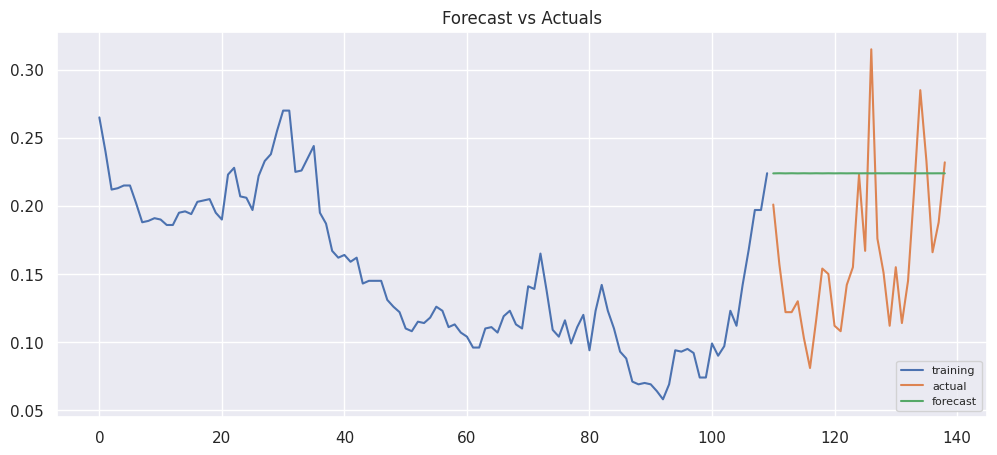

In [358]:
train = jpnq_df[:110]
test = jpnq_df[110:]
# print(len(train), len(test))
model, forecast = get_ARIMA(train, test, 1, 1, 1)

In [359]:
# Root Mean Squared Error (MSE)
print(forecast_accuracy(forecast,test.value))

0.08148921109030494


Premia Star50-u

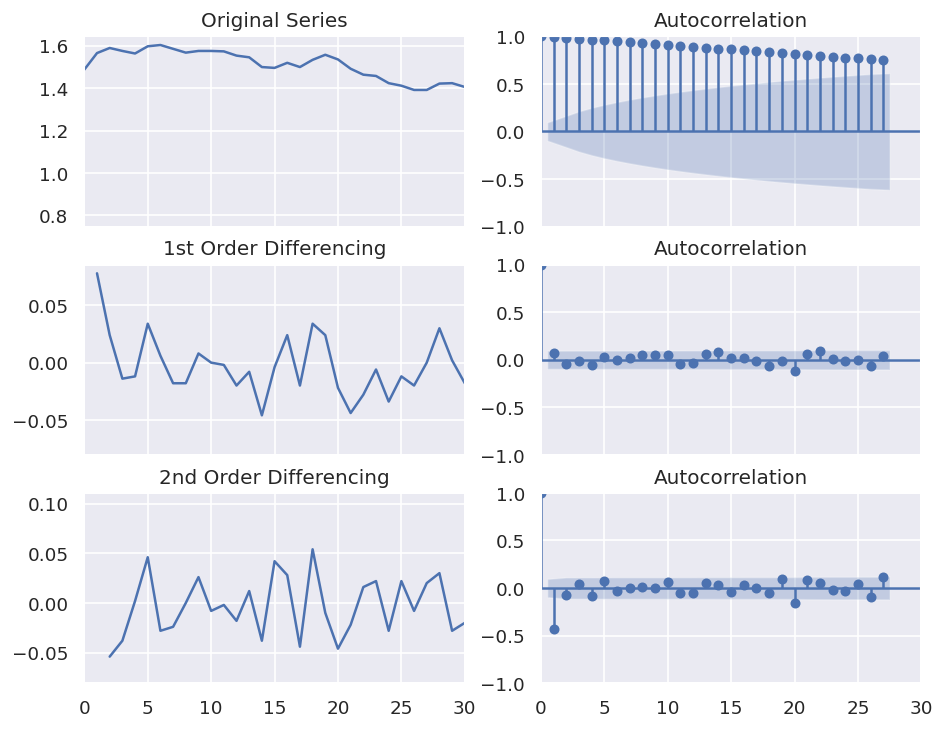

/home/ananthNB/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


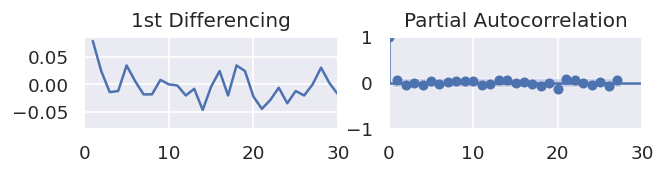

In [360]:
autocorrelation(premia_df)
partialcorrelation(premia_df)

d = 1, p = 1, q = 1

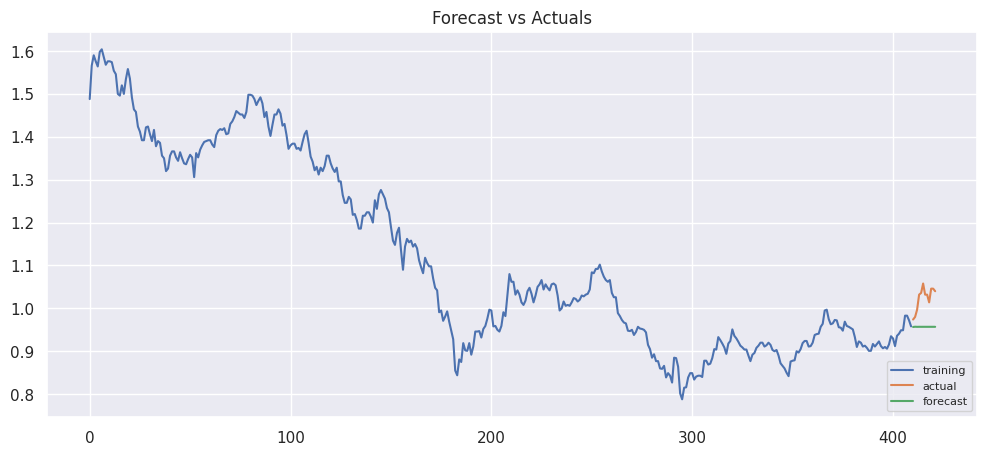

In [361]:
train = premia_df[:410]
test = premia_df[410:]
# print(len(train), len(test))
model, forecast = get_ARIMA(train, test, 1, 1, 1)

In [362]:
# Root Mean Squared Error (MSE)
print(forecast_accuracy(forecast,test.value))

0.07170754225918959


HeartCare-b

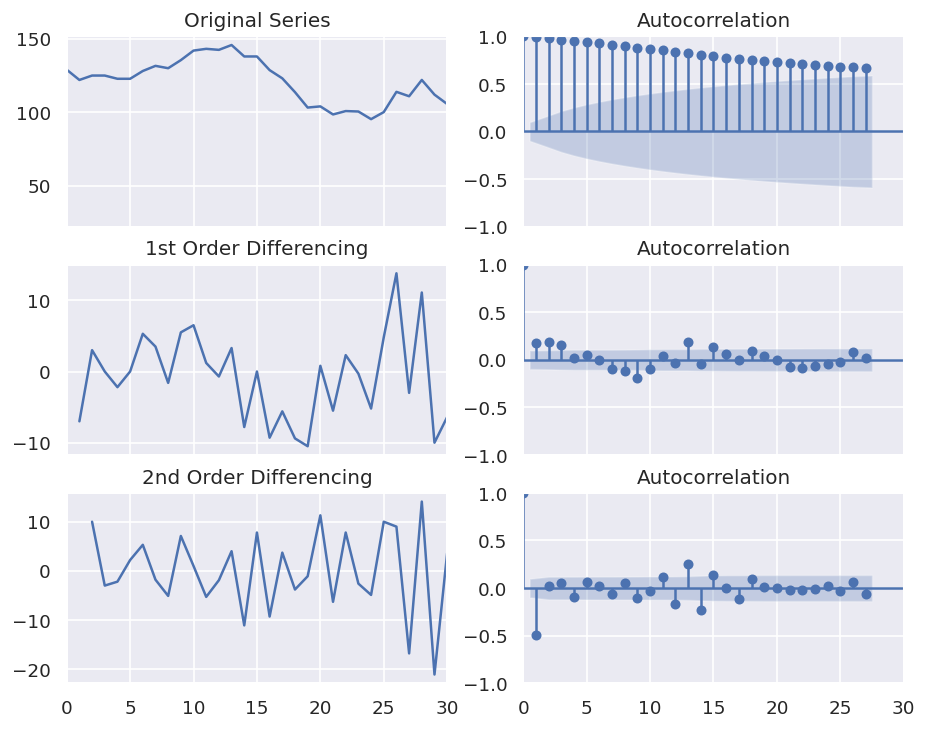

/home/ananthNB/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


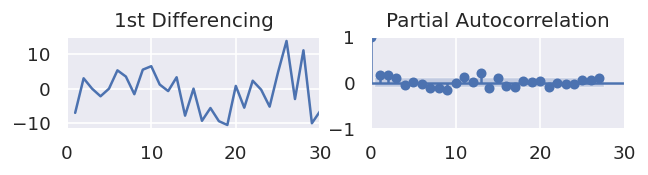

In [363]:
autocorrelation(heartCare_df)
partialcorrelation(heartCare_df)

d = 1, p = 1, a = 1

In [364]:
heartCare_df.shape

(405, 2)

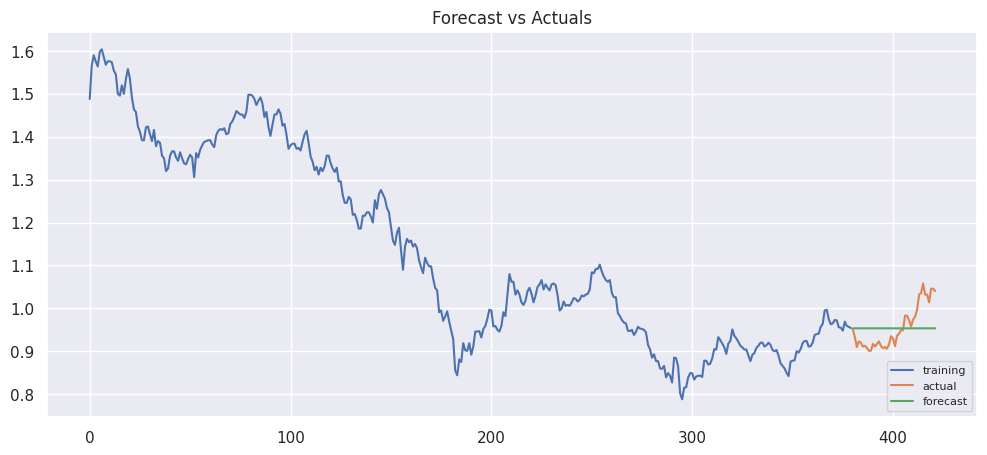

In [365]:
train = premia_df[:380]
test = premia_df[380:]
# print(len(train), len(test))
model, forecast = get_ARIMA(train, test, 1, 1, 1)

In [366]:
# Root Mean Squared Error (MSE)
print(forecast_accuracy(forecast,test.value))

0.04950982371720974


Acotec-b

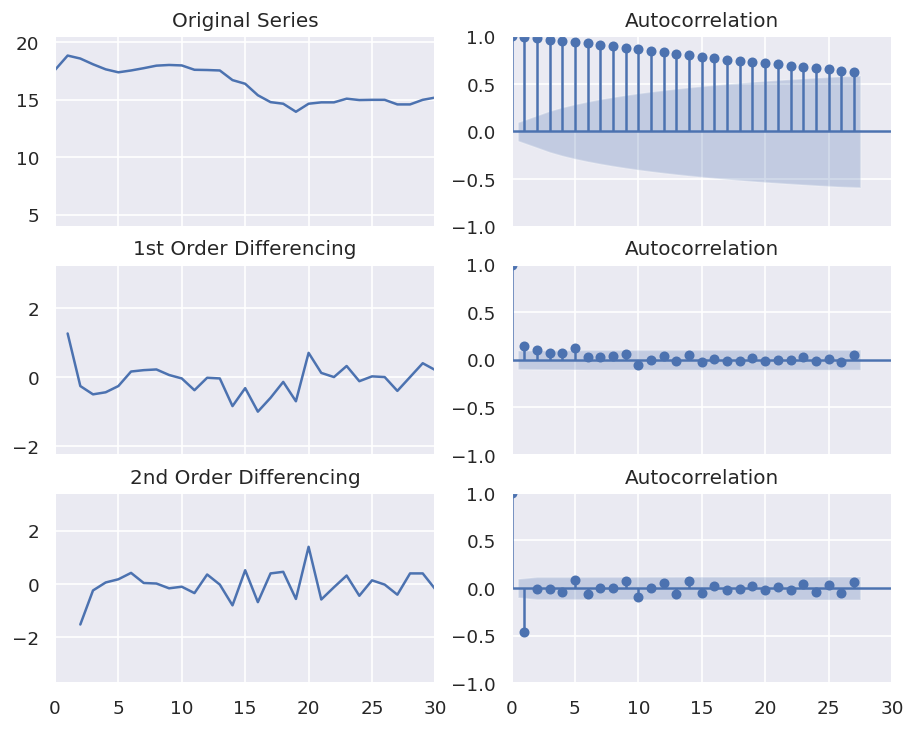

/home/ananthNB/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


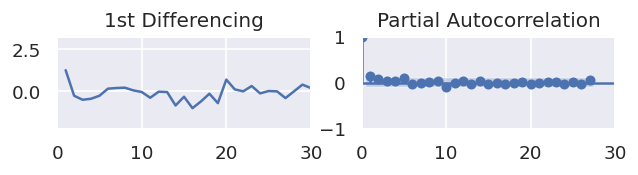

In [367]:
autocorrelation(acotec_df)
partialcorrelation(acotec_df)

d = 1, p = 1, q = 1

In [368]:
acotec_df.shape

(401, 2)

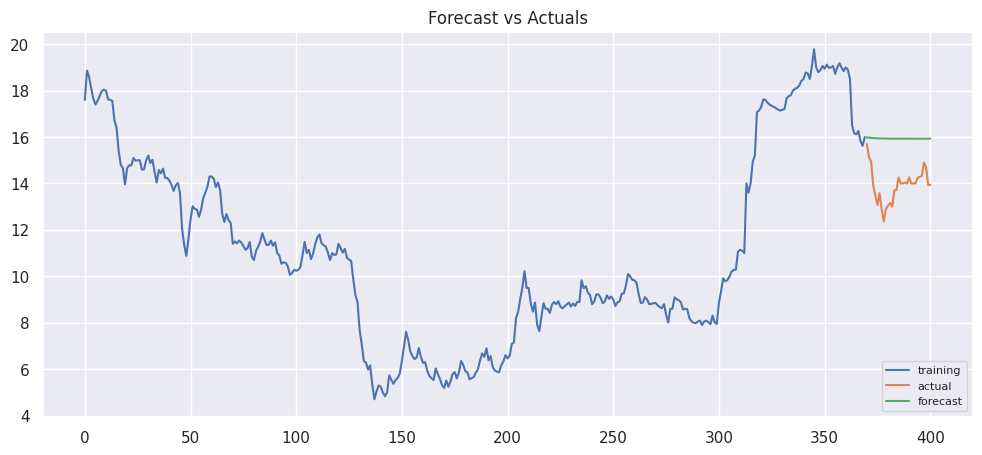

In [369]:
train = acotec_df[:370]
test = acotec_df[370:]
# print(len(train), len(test))
model, forecast = get_ARIMA(train, test, 1, 1, 1)

In [370]:
# Root Mean Squared Error (MSE)
print(forecast_accuracy(forecast,test.value))

2.1403798148543913
